**Download data**

In [176]:
import pandas as pd
import numpy as np
import os

In [177]:
df_train = pd.read_csv("train_sessions.csv", index_col='session_id', parse_dates=['time1'])
df_test = pd.read_csv("test_sessions.csv", index_col='session_id', parse_dates=['time1'])

In [178]:
df_train = df_train.sort_values(by="time1")
df_train.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


**Clean data**

In [179]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 21669 to 204762
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null datetime64[ns]
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(2), object(9)
memory usage: 42.6+ MB


In [180]:
for i in range(2, 11):
    df_train['time{}'.format(i)] = pd.to_datetime(df_train['time{}'.format(i)])
for i in range(2, 11):
    df_test['time{}'.format(i)] = pd.to_datetime(df_test['time{}'.format(i)])

In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 21669 to 204762
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null datetime64[ns]
site2     250098 non-null float64
time2     250098 non-null datetime64[ns]
site3     246919 non-null float64
time3     246919 non-null datetime64[ns]
site4     244321 non-null float64
time4     244321 non-null datetime64[ns]
site5     241829 non-null float64
time5     241829 non-null datetime64[ns]
site6     239495 non-null float64
time6     239495 non-null datetime64[ns]
site7     237297 non-null float64
time7     237297 non-null datetime64[ns]
site8     235224 non-null float64
time8     235224 non-null datetime64[ns]
site9     233084 non-null float64
time9     233084 non-null datetime64[ns]
site10    231052 non-null float64
time10    231052 non-null datetime64[ns]
target    253561 non-null int64
dtypes: datetime64[ns](10), float64(9), int64(2)
memory usage: 42.6 MB


**Pipeline configuration**

In [182]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [183]:
class DataPreparator(BaseEstimator, TransformerMixin):
    """
    Fill NaN with zero values.
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        sites = ['site%s' % i for i in range(1, 11)]
        return X[sites].fillna(0).astype('int')

In [184]:
class ListPreparator(BaseEstimator, TransformerMixin):
    """
    Prepare a CountVectorizer friendly 2D-list from data.
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.values.tolist()
        # Convert dataframe rows to strings
        return [" ".join([str(site) for site in row]) for row in X]

In [185]:
a = DataPreparator()
b = ListPreparator()

In [186]:
b.transform(a.transform(df_test))[:10]

['29 35 22 321 23 2211 6730 21 44582 15336',
 '782 782 782 782 782 782 782 782 782 782',
 '55 55 55 55 55 55 55 55 1445 1445',
 '1023 1022 50 222 202 3374 50 48 48 3374',
 '301 301 301 66 67 69 70 68 71 167',
 '1218 1220 1202 1221 1222 302 1217 1216 1221 1220',
 '43986 43986 43986 43986 43986 43986 43986 43986 43986 43986',
 '3346 3346 23 3346 3359 0 0 0 0 0',
 '1062 21 23 22 11009 8220 1063 21 2896 292',
 '77 77 75 876 80 76 23 76 75 77']

In [187]:
np.c_[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [188]:
class AttributesAdder(BaseEstimator, TransformerMixin):
    """
    Add new attributes to training and test set.
    """
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        # intraday features
        hour = X['time1'].apply(lambda ts: ts.hour)
        morning = ((hour >= 9) & (hour <= 11)).astype('int')
        day = ((hour >= 12) & (hour <= 18)).astype('int')
        evening = ((hour >= 19) & (hour <= 23)).astype('int')
        night = ((hour >= 0) & (hour <= 8)).astype('int')
        
        # season features
        month = X['time1'].apply(lambda ts: ts.month)
        summer = ((month >= 6) & (month <= 8)).astype('int')
        
        # day of the week features
        weekday = X['time1'].apply(lambda ts: ts.weekday()).astype('int')
        
        # year features
        year = X['time1'].apply(lambda ts: ts.year).astype('int')
        
        X = np.c_[morning.values, day.values, evening.values, night.values,
                  summer.values, weekday.values, year.values]
        return X

In [189]:
a = AttributesAdder()
a.transform(df_test)[:10]

array([[   1,    0,    0,    0,    0,    5, 2014],
       [   1,    0,    0,    0,    1,    3, 2014],
       [   0,    1,    0,    0,    0,    4, 2014],
       [   1,    0,    0,    0,    0,    1, 2014],
       [   0,    1,    0,    0,    0,    4, 2014],
       [   1,    0,    0,    0,    0,    4, 2014],
       [   0,    1,    0,    0,    0,    2, 2014],
       [   0,    1,    0,    0,    0,    6, 2014],
       [   1,    0,    0,    0,    1,    3, 2014],
       [   1,    0,    0,    0,    0,    4, 2014]])

In [190]:
class ScaledAttributesAdder(BaseEstimator, TransformerMixin):
    """
    Add new features, that should be scaled.
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # session time features
        times = ['time%s' % i for i in range(1, 11)]
        # session duration: take to the power of 1/5 to normalize the distribution
        session_duration = (X[times].max(axis=1) - X[times].min(axis=1)).astype('timedelta64[ms]').astype(int) ** 0.2
        # number of sites visited in a session
        number_of_sites = X[times].isnull().sum(axis=1).apply(lambda x: 10 - x)
        # average time spent on one site during a session
        time_per_site = (session_duration / number_of_sites) ** 0.2
        
        X = np.c_[session_duration.values]
        return X

In [191]:
a = ScaledAttributesAdder()
a.transform(df_test)[:10]

array([[ 5.87515878],
       [ 9.68018785],
       [ 9.65730299],
       [ 5.25305561],
       [ 6.6494951 ],
       [ 3.98107171],
       [ 7.57858283],
       [10.35402936],
       [ 4.57305052],
       [ 5.25305561]])

In [192]:
vectorizer_pipeline = Pipeline([
    ("preparator", DataPreparator()),
    ("list_preparator", ListPreparator()),
    ("vectorizer", CountVectorizer(ngram_range=(1, 3), max_features=50000))
])

attributes_pipeline = Pipeline([
    ("adder", AttributesAdder())
])

scaled_attributes_pipeline = Pipeline([
    ("adder", ScaledAttributesAdder()),
    ("scaler", StandardScaler())
])

In [193]:
full_pipeline = FeatureUnion(transformer_list=[
('vectorizer_pipeline', vectorizer_pipeline),
('attributes_pipeline', attributes_pipeline),
('scaled_attributes_pipeline', scaled_attributes_pipeline)
])

In [236]:
%%time
X_train = full_pipeline.fit_transform(df_train)
X_test = full_pipeline.transform(df_test)

y_train = df_train["target"].astype('int').values

**Cross-validation**

In [261]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [237]:
time_split = TimeSeriesSplit(n_splits=5)

logit = LogisticRegression(C=0.2, random_state=42, solver='liblinear')

cv_scores = cross_val_score(logit, X_train, y_train, cv=time_split, 
                        scoring='roc_auc', n_jobs=1)

print(cv_scores, cv_scores.mean())

[0.78230147 0.89068832 0.93684275 0.94501539 0.96424321] 0.9038182260658404


**Cross-validation ver.2**

In [224]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score , roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline

In [238]:
target = df_train['target']
x_train , x_valid , y_tr , y_valid = train_test_split(X_train, target, test_size=0.2)

In [286]:
logit = LogisticRegression(C=0.2, random_state=42, solver='liblinear')
logit.fit(x_train, y_tr)

prid_p_lr = logit.predict_proba(x_valid)[:, 1]

In [230]:
print('Train test split LogisticRegression score:% s ROC AUC' % round(roc_auc_score(y_valid, prid_p_lr), 4))
cross_score_lr = np.mean(cross_val_score(logit, X_train, target, scoring = 'roc_auc', cv=time_split))
print('Cross validation LogisticRegression score:% s ROC AUC' % round(cross_score_lr, 4))

Train test split LogisticRegression score:0.9671 ROC AUC
Cross validation LogisticRegression score:0.9198 ROC AUC


In [239]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 42, n_estimators = 10)
clf_rf.fit(x_train, y_tr)
preds_rf = clf_rf.predict_proba(x_valid)[:, 1]
print('Train test split RandomForestClassifier score:% s ROC AUC' % round(roc_auc_score(y_valid, preds_rf), 4))
cross_score_rf = np.mean(cross_val_score(clf_rf, X_train, target, scoring='roc_auc', cv=time_split))
print('Cross validation RandomForestClassifier score:% s ROC AUC' % round(cross_score_rf, 4))

Train test split RandomForestClassifier score:0.8653 ROC AUC
Cross validation RandomForestClassifier score:0.7228 ROC AUC


In [248]:
pd.Series(preds_rf).value_counts()

0.000000    47872
0.100000     1905
0.200000      510
0.300000      218
0.400000       87
0.500000       36
0.600000       31
0.800000       19
0.700000       17
1.000000        9
0.900000        4
0.033333        2
0.083333        1
0.075000        1
0.066667        1
dtype: int64

In [258]:
from xgboost import XGBRegressor

reg_xgb = XGBRegressor(10, 0.1, 10, objective='binary:logistic', random_state=42, booster='gblinear', scale_pos_weight=109)
reg_xgb.fit(x_train, y_tr)
preds_xgb_reg = reg_xgb.predict(x_valid)
print('Train test split XGBRegressor score:% s ROC AUC' % round(roc_auc_score(y_valid, preds_xgb_reg), 4))
cross_score_xgb_reg = np.mean(cross_val_score(reg_xgb, X_train, target, scoring='roc_auc', cv=time_split))
print('Cross validation XGBRegressor score:% s ROC AUC' % round(cross_score_xgb_reg, 4))

F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train test split XGBRegressor score:0.906 ROC AUC


F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Cross validation XGBRegressor score:0.8523 ROC AUC


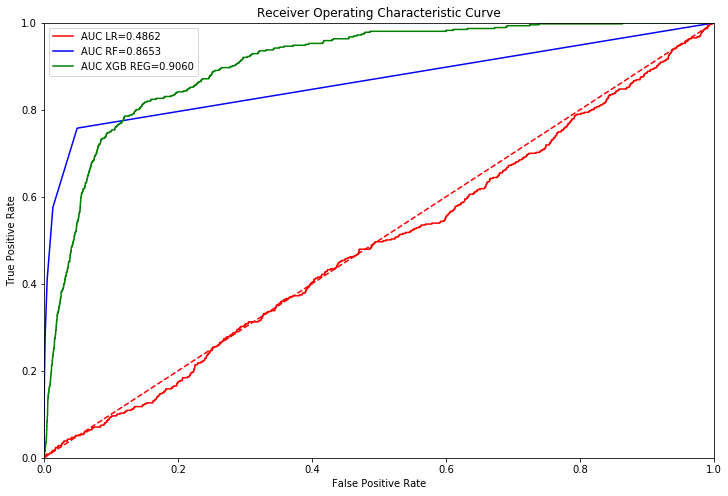

In [257]:
fpr_lr, tpr_lr, _ = roc_curve(y_valid, prid_p_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_valid, preds_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

fpr_xgb_reg, tpr_xgb_reg, _ = roc_curve(y_valid, preds_xgb_reg)
roc_auc_xgb_reg = auc(fpr_xgb_reg,tpr_xgb_reg)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr_lr, tpr_lr, 'r', label='AUC LR=%0.4f' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, 'b', label='AUC RF=%0.4f' % roc_auc_rf)
plt.plot(fpr_xgb_reg, tpr_xgb_reg, 'g', label='AUC XGB REG=%0.4f' % roc_auc_xgb_reg)
plt.legend(loc='lowerright')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [265]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_true,y_pred,title='Confusionmatrix'):
    table=confusion_matrix(y_true.values,y_pred)
    fig,ax=plt.subplots(frameon=False)
    fig.set_size_inches(4,3)
    fig.suptitle(title,fontsize=20)
    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    the_table=ax.table(cellText=table,
                        colWidths=[0.5]*len([0,1]),
                        rowLabels=['True 0','True 1'],colLabels=['Predicted 0','Predicted 1'],
                        cellLoc='center',rowLoc='center',loc="center")
    the_table.set_fontsize(34)
    the_table.scale(1,4)
    plt.show()

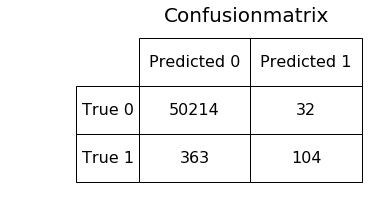

In [290]:
show_confusion_matrix(y_valid, logit.predict(x_valid))

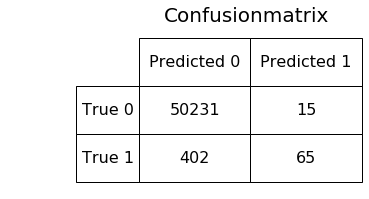

In [294]:
show_confusion_matrix(y_valid, clf_rf.predict(x_valid))

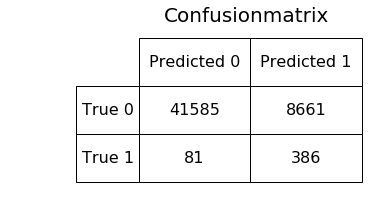

In [299]:
show_confusion_matrix(y_valid, [1 if i > 0.5 else 0 for i in reg_xgb.predict(x_valid)]) 

**Selection of hyperparameters**

In [87]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = [
    {'penalty' : ['l2'],
    'C' : [0.1, 0.2, 0.3, 0.4, 1],
    'solver' : ['liblinear']}]

In [149]:
grid_search = GridSearchCV(estimator=logit, param_grid = param_grid,
                                  scoring='roc_auc', n_jobs=-1, cv=time_split, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'penalty': ['l2'], 'C': [0.1, 0.2, 0.3, 0.4, 1], 'solver': ['liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [150]:
grid_search.best_params_

{'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}

In [151]:
grid_search.best_score_

0.9187456160609594

**Submitting results**

In [152]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [154]:
pred_proba = grid_search.predict_proba(X_test)[:, 1]
write_to_submission_file(pred_proba, "sub_oop1.csv")